In [1]:
import pandas as pd
data = pd.read_csv("temizFever.csv")

In [2]:
data.head()

,claim,claim_label
0,global warming is driving polar bears toward e...,SUPPORTS
1,the sun has gone into ‘lockdown’ which could c...,SUPPORTS
2,the polar bear population has been growing,REFUTES
3,ironic study finds more co has slightly cooled...,REFUTES
4,human additions of co are in the margin of err...,REFUTES


In [3]:
data.head(20)

,claim,claim_label
0,global warming is driving polar bears toward e...,SUPPORTS
1,the sun has gone into ‘lockdown’ which could c...,SUPPORTS
2,the polar bear population has been growing,REFUTES
3,ironic study finds more co has slightly cooled...,REFUTES
4,human additions of co are in the margin of err...,REFUTES
5,they tell us that we are the primary forces co...,SUPPORTS
6,the great barrier reef is experiencing the mos...,SUPPORTS
7,it’s not a pollutant that threatens human civi...,REFUTES
8,if co was so terrible for the planet then inst...,REFUTES
9,sea level rise has been slow and a constant pr...,REFUTES


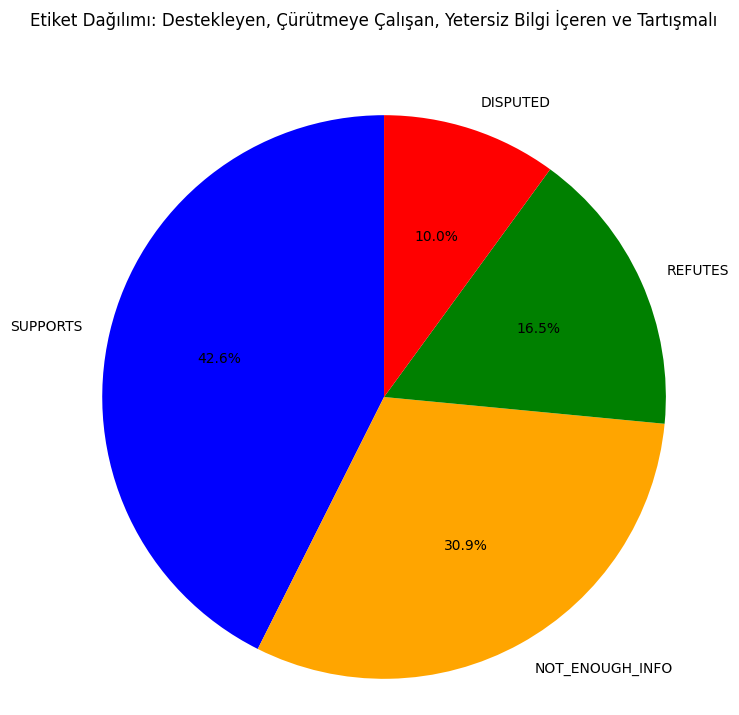

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart
"""fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Destekleyen, Çürütmeye çalışan, Yetersiz bilgi içeren ve Tartışmalı olarak ayrılmış etiketler')
sns.countplot(ax=ax, x='claim_label', data=data, color='blue', order=data['claim_label'].value_counts().index)"""

# Bence pie chart daha iyi oluyor
label_counts = data['claim_label'].value_counts()

# Pie chart icin
fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Etiket Dağılımı: Destekleyen, Çürütmeye Çalışan, Yetersiz Bilgi İçeren ve Tartışmalı')

# Pie chart oluştur
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'red'])

# Eksenleri eşit yaparak daire şekli sağla
ax.axis('equal')

# Göster
plt.show()

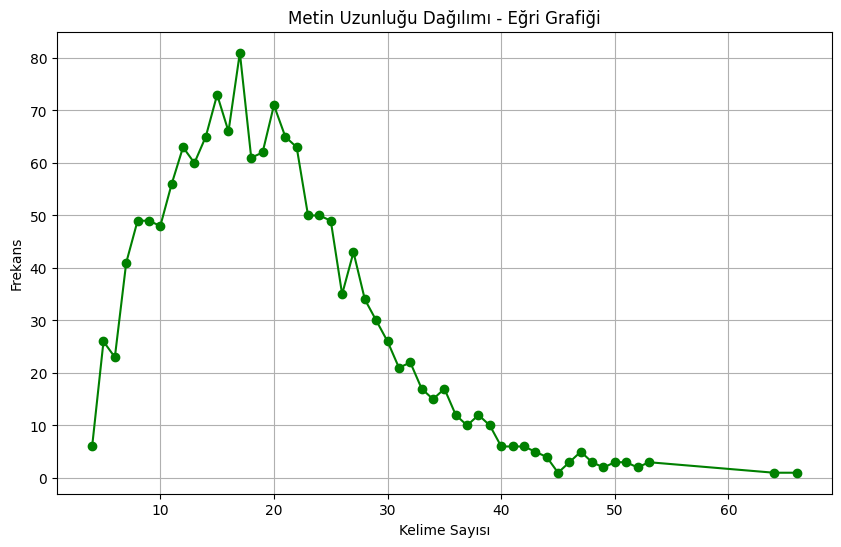

Metinlerde Ortalama cümle uzunluğu: 19.76


In [5]:
message_lengths = data['claim'].astype(str).apply(lambda x: len(x.split()))

average_length = message_lengths.mean()

plt.figure(figsize=(10, 6))

# Kelime uzunluklarının frekansını hesapla
message_length_counts = message_lengths.value_counts().sort_index()

# Eğri grafiği çiz
plt.plot(message_length_counts.index, message_length_counts.values, marker='o', color='green', linestyle='-')

# Grafik başlık ve etiketler
plt.title('Metin Uzunluğu Dağılımı - Eğri Grafiği')
plt.xlabel('Kelime Sayısı')
plt.ylabel('Frekans')
plt.grid(True)  # Daha okunaklı bir grafik için ızgara ekleyin
plt.show()

print(f"Metinlerde Ortalama cümle uzunluğu: {average_length:.2f}")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense, Dropout, MaxPooling1D, Flatten
from transformers import BertTokenizer, TFBertForSequenceClassification
print("Transformers kütüphanesi basariyla yüklendi!")



X = data['claim']
y = data['claim_label']



Transformers kütüphanesi basariyla yüklendi!


Test Accuracy: 0.47071583514099785


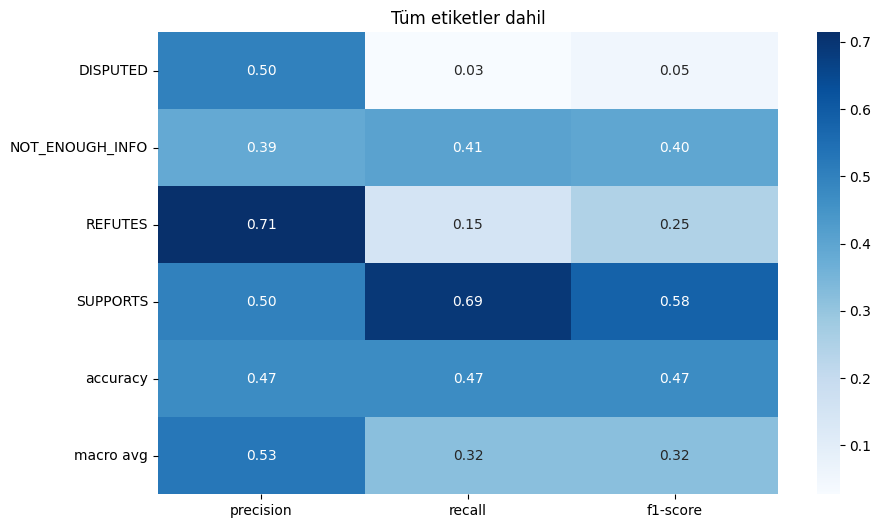

                 precision    recall  f1-score   support

       DISPUTED       0.50      0.03      0.05        37
NOT_ENOUGH_INFO       0.39      0.41      0.40       143
        REFUTES       0.71      0.15      0.25        67
       SUPPORTS       0.50      0.69      0.58       214

       accuracy                           0.47       461
      macro avg       0.53      0.32      0.32       461
   weighted avg       0.50      0.47      0.43       461



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# Metin verisini ve etiketleri ayıralım
text_data = data['claim']
labels = data['claim_label']

# TF-IDF özellik çıkarımı (en çok kullanılan 30000 kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=30000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (400 boyuta indir)
svd = TruncatedSVD(n_components= 400, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Eğitim ve test verilerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=42)

# Logistic Regression modelini tanımlayalım
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)

# Tahmin yapalım
y_pred = logistic_model.predict(X_test)

# Modelin başarımını değerlendirelim
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Sınıf adlarını string olarak geçelim
target_names = [str(cls) for cls in label_encoder.classes_]


report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

report_df = pd.DataFrame(report).transpose()

# Heatmap ile tabloyu görselleştir TF-IDF'den once
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Tüm etiketler dahil")
plt.show()

# Sınıflandırma raporu yazdıralım
print(classification_report(y_test, y_pred, target_names=target_names))

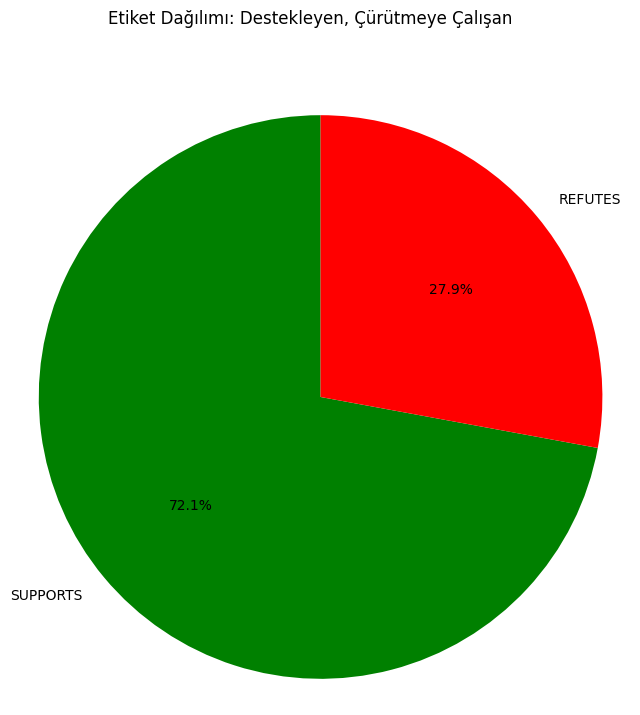

                                                claim claim_label
0   global warming is driving polar bears toward e...    SUPPORTS
1   the sun has gone into ‘lockdown’ which could c...    SUPPORTS
2          the polar bear population has been growing     REFUTES
3   ironic study finds more co has slightly cooled...     REFUTES
4   human additions of co are in the margin of err...     REFUTES
5   they tell us that we are the primary forces co...    SUPPORTS
6   the great barrier reef is experiencing the mos...    SUPPORTS
7   it’s not a pollutant that threatens human civi...     REFUTES
8   if co was so terrible for the planet then inst...     REFUTES
9   sea level rise has been slow and a constant pr...     REFUTES
11  volcanoes melting west antarctic glaciers not ...    SUPPORTS
13  discovery of massive volcanic co emissions dis...    SUPPORTS
14  harvard study finds that wind turbines create ...     REFUTES
15        ice berg melts ocean level remains the same     REFUTES
17  scient

In [8]:

# "label" sütununda "DISPUTED" ve "NOT_ENOUGH_INFO" olan satırları filtrele
data = data[~data['claim_label'].isin(['DISPUTED', 'NOT_ENOUGH_INFO'])]

# Bence pie chart daha iyi oluyor
label_counts = data['claim_label'].value_counts()

# Pie chart icin
fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Etiket Dağılımı: Destekleyen, Çürütmeye Çalışan')

# Pie chart oluştur
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])

# Eksenleri eşit yaparak daire şekli sağla
ax.axis('equal')

# Göster
plt.show()

print(data.head(20))



Test Accuracy: 0.7435897435897436


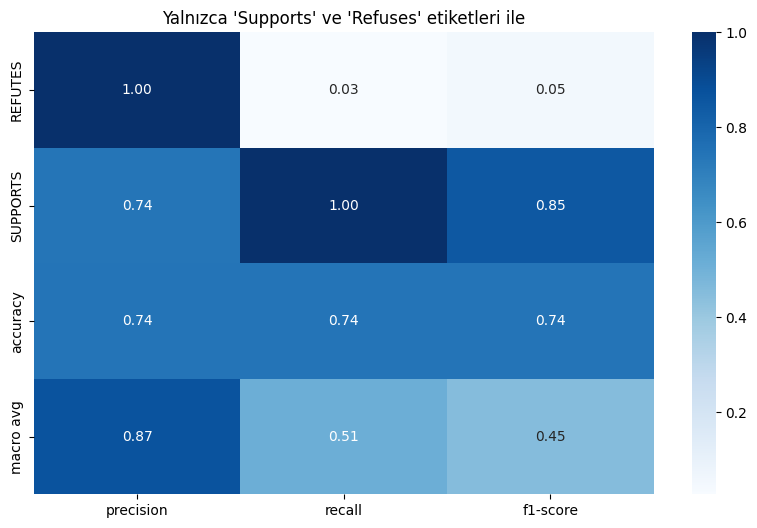

              precision    recall  f1-score   support

     REFUTES       1.00      0.03      0.05        72
    SUPPORTS       0.74      1.00      0.85       201

    accuracy                           0.74       273
   macro avg       0.87      0.51      0.45       273
weighted avg       0.81      0.74      0.64       273



In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# Metin verisini ve etiketleri ayıralım
text_data = data['claim']
labels = data['claim_label']

# TF-IDF özellik çıkarımı (en çok kullanılan 10000 kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=30000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (100 boyuta indir)
svd = TruncatedSVD(n_components= 400, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Eğitim ve test verilerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=42)

# Logistic Regression modelini tanımlayalım
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)

# Tahmin yapalım
y_pred = logistic_model.predict(X_test)

# Modelin başarımını değerlendirelim
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Sınıf adlarını string olarak geçelim
target_names = [str(cls) for cls in label_encoder.classes_]

report_after = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

report_df_after = pd.DataFrame(report_after).transpose()

# Heatmap ile tabloyu görselleştir TF-IDF'den once
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_after.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Yalnızca 'Supports' ve 'Refuses' etiketleri ile")
plt.show()

# Sınıflandırma raporu yazdıralım
print(classification_report(y_test, y_pred, target_names=target_names))

In [10]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [11]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Lemmatizer'ı tanımla
lemmatizer = WordNetLemmatizer()

# Lemmatization işlemi
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Metni kelimelere ayır
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]  # Her kelimeyi lemmatize et
    return ' '.join(lemmatized)  # Tekrar birleştir

# Yeni sütun ekleyerek lemmatize edilmiş metinleri sakla
data['LemmatizeClaim'] = data['claim'].apply(lemmatize_text)

# Sonucu kontrol et
print(data)


                                                  claim claim_label  \
0     global warming is driving polar bears toward e...    SUPPORTS   
1     the sun has gone into ‘lockdown’ which could c...    SUPPORTS   
2            the polar bear population has been growing     REFUTES   
3     ironic study finds more co has slightly cooled...     REFUTES   
4     human additions of co are in the margin of err...     REFUTES   
...                                                 ...         ...   
1526  cloud cover in models is poorly treated and in...    SUPPORTS   
1528  given that a doubling of carbon dioxide would ...    SUPPORTS   
1529           the great barrier reef is in fine fettle     REFUTES   
1532  there are other possible causes for climate ch...    SUPPORTS   
1534  over the last decade heatwaves are five times ...    SUPPORTS   

                                         LemmatizeClaim  
0     global warming is driving polar bear toward ex...  
1     the sun ha gone into ‘ lo

In [12]:
data.head()

,claim,claim_label,LemmatizeClaim
0,global warming is driving polar bears toward e...,SUPPORTS,global warming is driving polar bear toward ex...
1,the sun has gone into ‘lockdown’ which could c...,SUPPORTS,the sun ha gone into ‘ lockdown ’ which could ...
2,the polar bear population has been growing,REFUTES,the polar bear population ha been growing
3,ironic study finds more co has slightly cooled...,REFUTES,ironic study find more co ha slightly cooled t...
4,human additions of co are in the margin of err...,REFUTES,human addition of co are in the margin of erro...


In [13]:
#lemmalanmış veri ile çalışma


text_data = data['LemmatizeClaim']
labels = data['claim_label']

tfidf_vectorizer = TfidfVectorizer(max_features=30000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

svd = TruncatedSVD(n_components= 700, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)


X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

target_names = [str(cls) for cls in label_encoder.classes_]

print(classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy: 0.7307692307692307
              precision    recall  f1-score   support

     REFUTES       0.67      0.04      0.08        50
    SUPPORTS       0.73      0.99      0.84       132

    accuracy                           0.73       182
   macro avg       0.70      0.52      0.46       182
weighted avg       0.71      0.73      0.63       182



In [14]:
data.to_csv('lemmaVeri.csv', index=False)


In [15]:
data = pd.read_csv("lemmaVeri.csv")

C:\Users\ROG\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=5000 is greater than n_features=2893. All the features will be returned.
  warnings.warn(


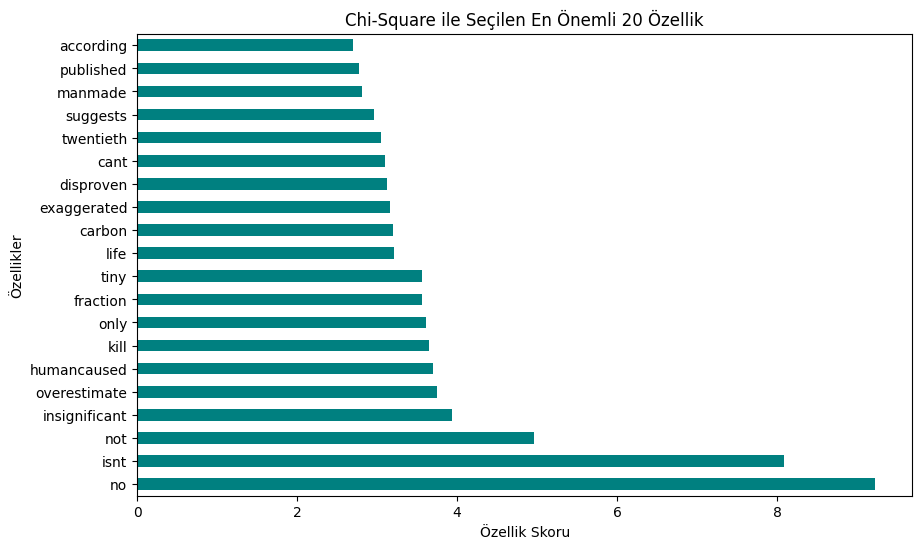

0       total population getting benefit safe potable ...
1       wrap — ppl electric ’ s winter relief assistan...
2       believe power monitoring help hcms plant refor...
3       solvent used ink produce almost volatile organ...
4       going gradual get end year year starting place...
                              ...                        
2642    addition aurizon analysis climate change polic...
2643    renewable energy policy since regulatory suppo...
2644    diamond green diesel project spill frankly exp...
2645    think look major cost saving it ’ s going come...
2646    weve great progress delevering balance sheet s...
Name: LemmatizeText, Length: 2647, dtype: object
SVD ile indirgenmiş boyut: (2647, 900)

Logistic Regression Test Accuracy: 0.8498727735368957


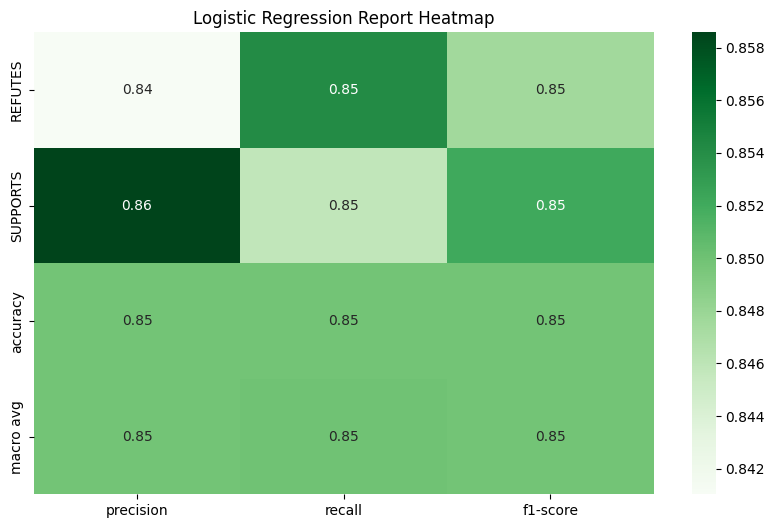

              precision    recall  f1-score   support

     REFUTES       0.84      0.85      0.85       192
    SUPPORTS       0.86      0.85      0.85       201

    accuracy                           0.85       393
   macro avg       0.85      0.85      0.85       393
weighted avg       0.85      0.85      0.85       393


Support Vector Machine (SVM) Test Accuracy: 0.8727735368956743


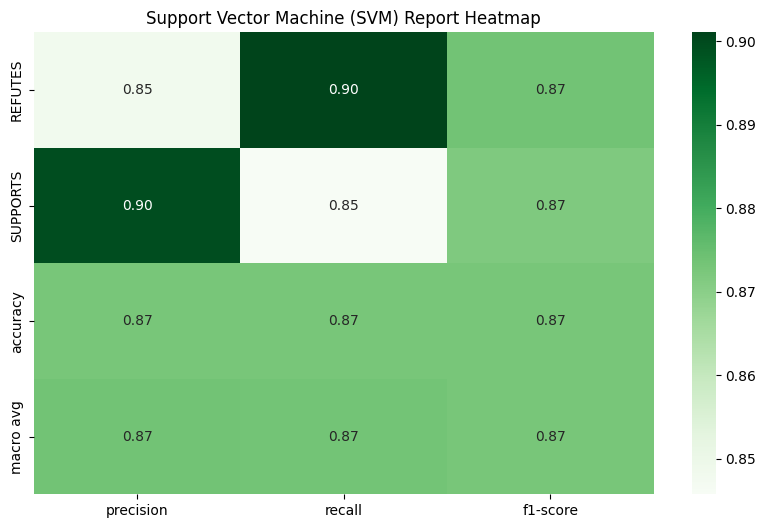

              precision    recall  f1-score   support

     REFUTES       0.85      0.90      0.87       192
    SUPPORTS       0.90      0.85      0.87       201

    accuracy                           0.87       393
   macro avg       0.87      0.87      0.87       393
weighted avg       0.87      0.87      0.87       393


K-Nearest Neighbors (KNN) Test Accuracy: 0.4961832061068702


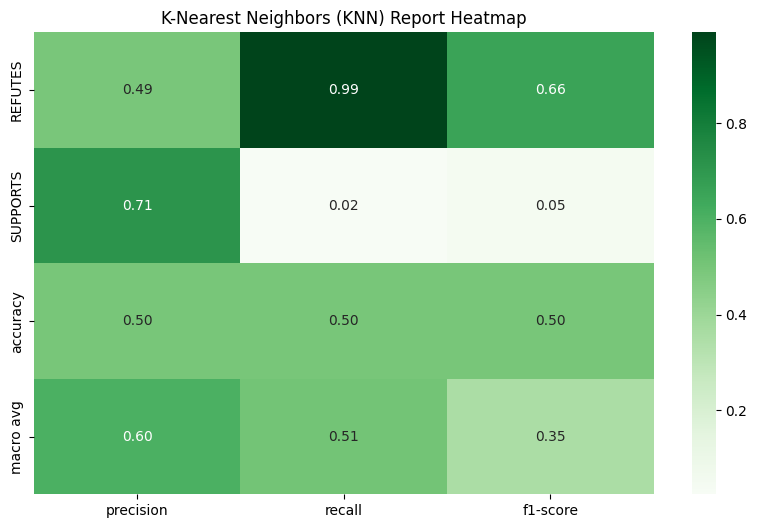

              precision    recall  f1-score   support

     REFUTES       0.49      0.99      0.66       192
    SUPPORTS       0.71      0.02      0.05       201

    accuracy                           0.50       393
   macro avg       0.60      0.51      0.35       393
weighted avg       0.61      0.50      0.35       393


Decision Tree Test Accuracy: 0.7379134860050891


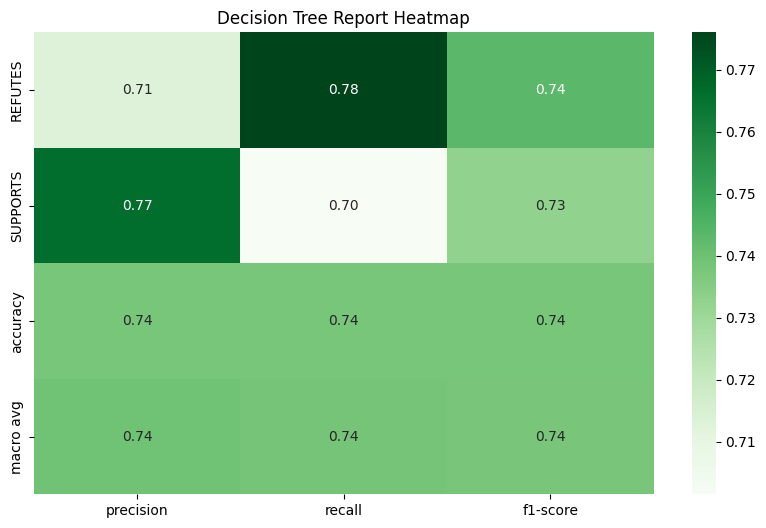

              precision    recall  f1-score   support

     REFUTES       0.71      0.78      0.74       192
    SUPPORTS       0.77      0.70      0.73       201

    accuracy                           0.74       393
   macro avg       0.74      0.74      0.74       393
weighted avg       0.74      0.74      0.74       393


Multi-Layer Perceptron (MLP) Test Accuracy: 0.8829516539440203


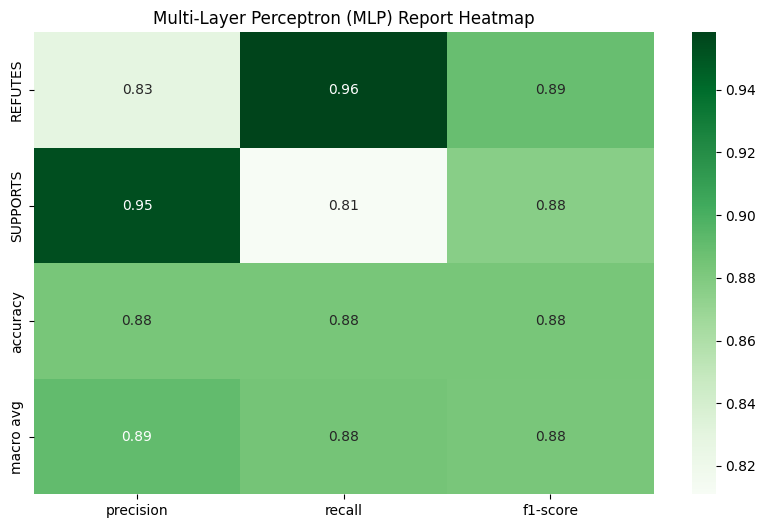

              precision    recall  f1-score   support

     REFUTES       0.83      0.96      0.89       192
    SUPPORTS       0.95      0.81      0.88       201

    accuracy                           0.88       393
   macro avg       0.89      0.88      0.88       393
weighted avg       0.89      0.88      0.88       393


Random Forest Test Accuracy: 0.8625954198473282


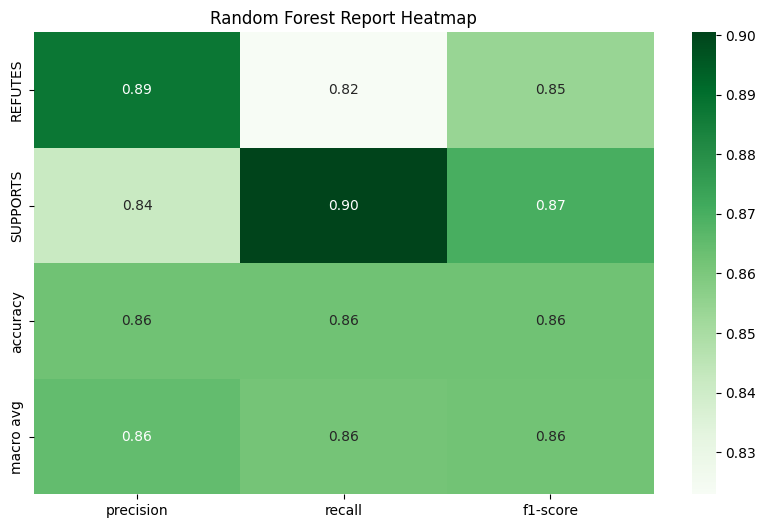

              precision    recall  f1-score   support

     REFUTES       0.89      0.82      0.85       192
    SUPPORTS       0.84      0.90      0.87       201

    accuracy                           0.86       393
   macro avg       0.86      0.86      0.86       393
weighted avg       0.86      0.86      0.86       393


XGBoost Test Accuracy: 0.811704834605598


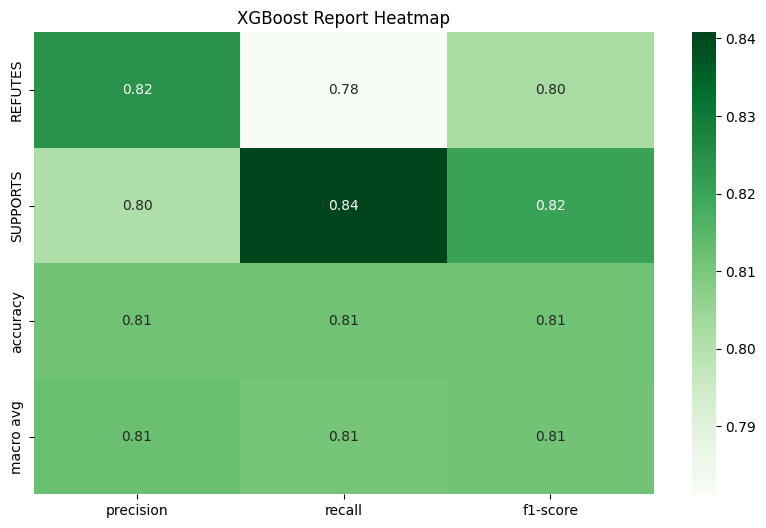

              precision    recall  f1-score   support

     REFUTES       0.82      0.78      0.80       192
    SUPPORTS       0.80      0.84      0.82       201

    accuracy                           0.81       393
   macro avg       0.81      0.81      0.81       393
weighted avg       0.81      0.81      0.81       393



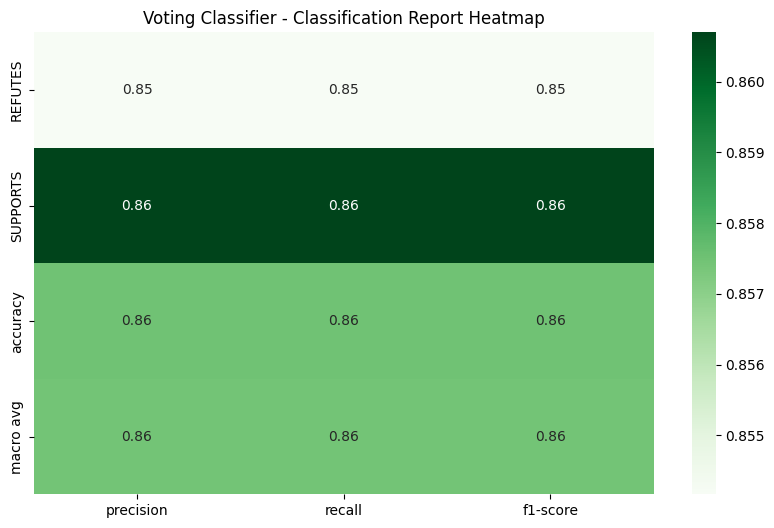

c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5278 - loss: 0.6891 - val_accuracy: 0.6612 - val_loss: 0.6762
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8180 - loss: 0.6372 - val_accuracy: 0.8251 - val_loss: 0.5619
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9359 - loss: 0.3863 - val_accuracy: 0.8689 - val_loss: 0.3561
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9788 - loss: 0.1123 - val_accuracy: 0.8743 - val_loss: 0.3151
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9847 - loss: 0.0418 - val_accuracy: 0.9016 - val_loss: 0.2839
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9997 - loss: 0.0104 - val_accuracy: 0.8962 - val_loss: 0.3393
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9981 - loss: 0.0082 - val_accuracy: 0.8962 - val_loss: 0.3326
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9071 - v

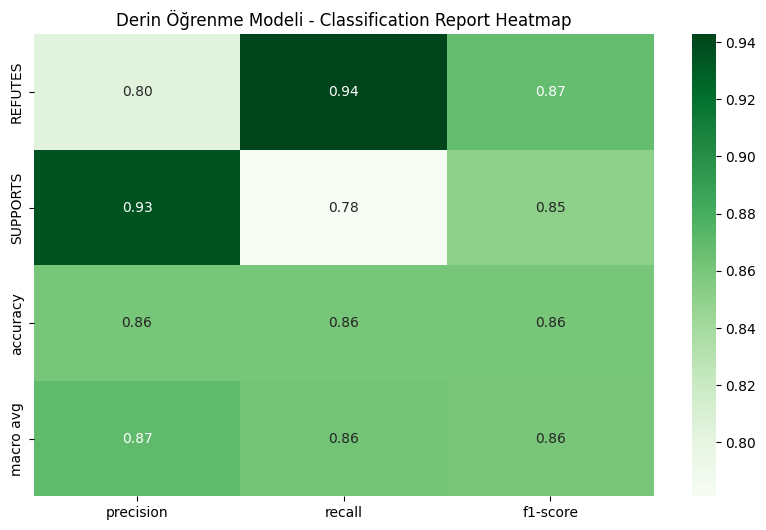

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 2893, but received input with shape (32, 900)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 900), dtype=float32)
  • training=False
  • mask=None

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.feature_selection import SelectKBest, chi2
import xgboost as xgb
import pandas as pd

# Metin verisini ve etiketleri ayıralım
text_data = data['LemmatizeClaim']
labels = data['claim_label']

# TF-IDF özellik çıkarımı (30000 en çok kullanılan kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (400 boyuta indir)
svd = TruncatedSVD(n_components=900, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Chi-Square ile ozellik secimi
selector = SelectKBest(chi2, k=5000)
X_selected = selector.fit_transform(X_tfidf, y_encoded)

# Verileri dengelemeye calisma anlari xd (Burada onceden X_selected yerine X_reduced vardi)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_selected, y_encoded)

# SMOTE kullanimi (Burada da eskiden X_selected yerine X_reduced vardi)
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_selected, y_encoded)

# Eğitim ve test verilerini ayıralım (oncekiler = X_reduced ve y_encoded, Yeniler = X_resampled ve y_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.3, random_state=42)


# Chi-Square ile seçilen özelliklerin önem dereceleri
feature_scores = selector.scores_

# İlk 20 özelliği görselleştirme
top_features = pd.Series(feature_scores, index=tfidf_vectorizer.get_feature_names_out()).nlargest(20)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='teal')
plt.title("Chi-Square ile Seçilen En Önemli 20 Özellik")
plt.xlabel("Özellik Skoru")
plt.ylabel("Özellikler")
plt.show()


lemma_climate_data = pd.read_csv("lemmaClimate")
text_data_new = lemma_climate_data['LemmatizeText']

print(text_data_new)

# Yeni veri için TF-IDF
X_new_tfidf = tfidf_vectorizer.fit_transform(text_data_new)

# Yeni veri için SVD ve Chi-Kare
#X_new_selected = selector.fit_transform(X_new_tfidf)

X_new_reduced = svd.fit_transform(X_new_tfidf)

X_new_reduced_shaped = X_new_reduced[:, :X_new_reduced.shape[1]]

print("SVD ile indirgenmiş boyut:", X_new_reduced.shape)

expected_input_dim = X_resampled.shape[1]

# Eğer boyut farklıysa, boyutları eşitleyin
if X_new_reduced_shaped.shape[1] != expected_input_dim:
    scaler = StandardScaler()
    X_new_resized = scaler.fit_transform(X_new_reduced_shaped)
    X_new_resized = X_new_resized[:, :expected_input_dim]  # Gerekiyorsa fazla sütunları kesin
else:
    X_new_resized = X_new_reduced_shaped


# Model isimlerinin oldugu dizi
model_isimleri = ["Lojistik regresyon", "SVM", "K-Nearest Neighbors", "Karar agaclari", "Yapay sinir aglari (MLP)", "Rastgele Orman", "XGBoost", "Voting Classifier", "Derin Öğrenme (Keras)"]
# Model dogruluklarinin eklenecegi dizi
model_dogruluklari = [] 

# Model Eğitimi ve Değerlendirmesi
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)  # Modeli eğit
    y_pred = model.predict(X_test)  # Tahmin yap
    
    # Modelin başarımını değerlendirelim
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Test Accuracy: {accuracy}")
    
    # Sınıf adlarını string olarak geçelim
    target_names = [str(cls) for cls in label_encoder.classes_]


    model_dogruluklari.append(accuracy)

    # Her bir model sonucu heatmap olusturmak icin buradan asagisini ben ekledim
    report_model = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

    report_df_model = pd.DataFrame(report_model).transpose()

    # Heatmap ile tabloyu görselleştir
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df_model.iloc[:-1, :-1], annot=True, cmap="Greens", fmt=".2f")
    plt.title(f"{model_name} Report Heatmap")
    plt.show()
    # Benim ekledigim yerin sonu

    print(classification_report(y_test, y_pred, target_names=target_names))

# Logistic Regression
logistic_model = LogisticRegression(max_iter=500, random_state=42)
evaluate_model(logistic_model, "Logistic Regression")

# SVM
svm_model = SVC(kernel='linear', random_state=42)
evaluate_model(svm_model, "Support Vector Machine (SVM)")

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, "K-Nearest Neighbors (KNN)")

# Karar Ağaçları
decision_tree_model = DecisionTreeClassifier(random_state=42)
evaluate_model(decision_tree_model, "Decision Tree")

# Yapay Sinir Ağları (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
evaluate_model(mlp_model, "Multi-Layer Perceptron (MLP)")

# Rastgele orman
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, "Random Forest")

# XGBoost
params = {'objective': ['binary:logistic'], 'scale_pos_weight': [1, 2, 3], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'n_estimators': [100, 200]}
xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42), params, cv=5)
#xgb_model.fit(X_trains, y_train)
evaluate_model(xgb_grid, "XGBoost")

# Voting model
voting_model = VotingClassifier(estimators=[
    ('lr', logistic_model),
    ('svc', svm_model),
    ('rf', rf_model)
], voting='hard')

voting_model.fit(X_train, y_train)
#accuracy_voting = voting_model.score(X_test, y_test)
accuracy_voting = accuracy_score(y_test, voting_model.predict(X_test))
model_dogruluklari.append(accuracy_voting)


y_pred_voting = voting_model.predict(X_test)
report_voting = classification_report(y_test, y_pred_voting, target_names=[str(cls) for cls in label_encoder.classes_], output_dict=True)
report_df_voting = pd.DataFrame(report_voting).transpose()

# Heatmap ile görselleştir VOTING MODEL
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_voting.iloc[:-1, :-1], annot=True, cmap="Greens", fmt=".2f")
plt.title("Voting Classifier - Classification Report Heatmap")
plt.show()

# derin ogrenme
model_derin = Sequential([
    Dense(512, activation='relu', input_dim=X_resampled.shape[1]),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_derin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_derin.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_pred_derin = (model_derin.predict(X_test) > 0.5).astype("int32")
accuracy_derin = accuracy_score(y_test, y_pred_derin)
model_dogruluklari.append(accuracy_derin)


report_derin = classification_report(y_test, y_pred_derin, target_names=[str(cls) for cls in label_encoder.classes_], output_dict=True)
report_df_derin = pd.DataFrame(report_derin).transpose()

# Heatmap ile görselleştir DERIN OGRENME
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_derin.iloc[:-1, :-1], annot=True, cmap="Greens", fmt=".2f")
plt.title("Derin Öğrenme Modeli - Classification Report Heatmap")
plt.show()


#Tahminlerin alinmasi
y_pred_new = (model_derin.predict(X_new_resized)>0.5).astype("int32")

# Tahminlerin etikete donusturulmesi
predicted_labels = label_encoder.inverse_transform(y_pred_new.flatten())

# Etiketlerin dağılımını sayma
label_counts = pd.Series(predicted_labels).value_counts()

# Pasta grafiği ile görselleştirme
plt.figure(figsize=(8, 6))
label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Tahmin Sonuçları - SUPPORTS vs REFUTES")
plt.ylabel("")
plt.show()


# Buradan hücrenin sonuna kadar da ben ekledim.
plt.figure(figsize=(10, 6))
sns.barplot(x=model_dogruluklari, y=model_isimleri, palette='mako')
plt.xlabel('Doğruluk Oranı')
plt.title('Farklı Modellerin Doğruluk Oranları')
plt.xlim(0, 1)
plt.show()

Epoch 1/50


c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7121 - loss: 0.6539 - val_accuracy: 0.7363 - val_loss: 0.5804
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6997 - loss: 0.6108 - val_accuracy: 0.7363 - val_loss: 0.5851
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7078 - loss: 0.5944 - val_accuracy: 0.7289 - val_loss: 0.5896
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7333 - loss: 0.5769 - val_accuracy: 0.7289 - val_loss: 0.5908
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7240 - loss: 0.5773 - val_accuracy: 0.7363 - val_loss: 0.5919
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7347 - loss: 0.5757 - val_accuracy: 0.7326 - val_loss: 0.5916
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6747 - loss: 0.6186 - val_accuracy: 0.7289 - val_loss: 0.5903
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6932 - loss: 0.6063 - val_accuracy: 0.7363 - val_loss: 0.5921
Ep

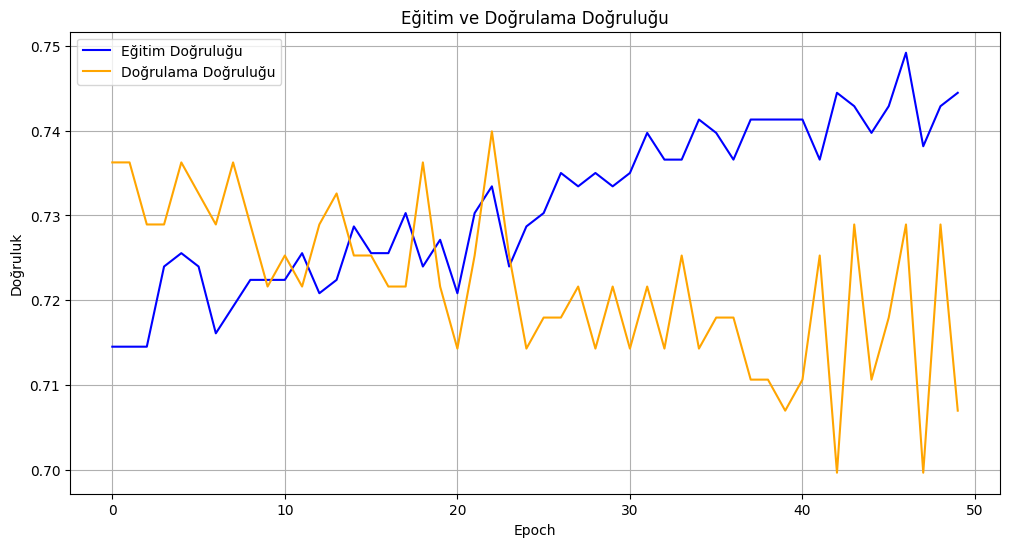

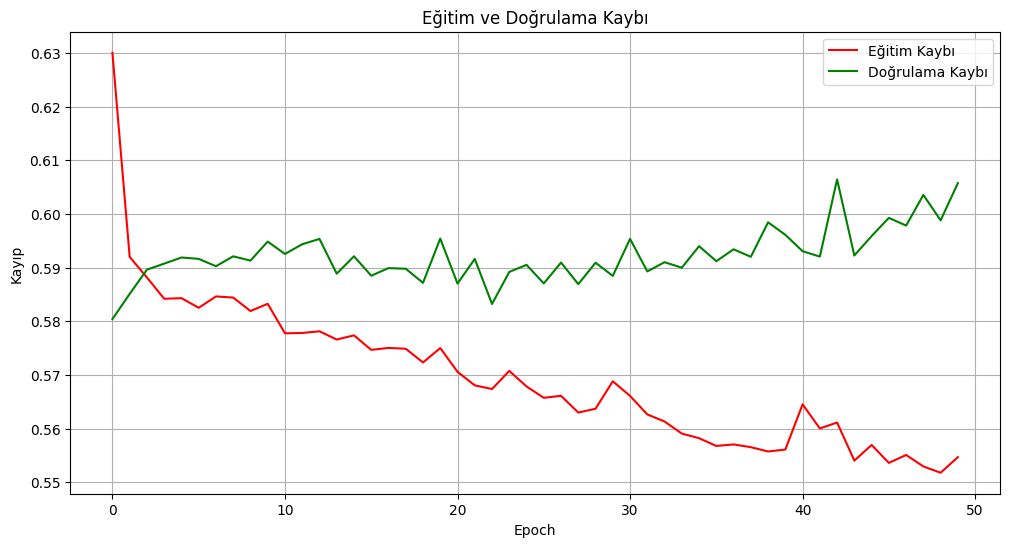

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.5909 
Test Accuracy: 0.7069597244262695


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd

# TF-IDF özellik çıkarımı (en çok kullanılan 10000 kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (3 boyuta indir)
svd = TruncatedSVD(n_components=3, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

# Eğitim ve test verilerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_categorical, test_size=0.3, random_state=42)

# Yapay sinir ağı modelini tanımlayalım
model = Sequential([
    Dense(256, input_dim=3, activation='relu'),
    Dense(128, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Modeli derleyelim
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitelim
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


# Eğitim ve doğrulama doğruluğunu görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu', color='blue')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', color='orange')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.show()

# Eğitim ve doğrulama kaybını görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı', color='red')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', color='green')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)
plt.show()


# Modelin başarımını değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


In [22]:
pip install xgboost

                                              0.0/124.9 MB ? eta -:--:--
                                              0.0/124.9 MB 1.9 MB/s eta 0:01:06
                                              0.1/124.9 MB 1.3 MB/s eta 0:01:36
                                              0.1/124.9 MB 1.6 MB/s eta 0:01:17
                                              0.2/124.9 MB 1.3 MB/s eta 0:01:36
                                              0.2/124.9 MB 1.3 MB/s eta 0:01:36
                                              0.2/124.9 MB 1.1 MB/s eta 0:01:53
                                              0.3/124.9 MB 1.5 MB/s eta 0:01:23
                                              0.4/124.9 MB 1.6 MB/s eta 0:01:17
                                              0.5/124.9 MB 1.7 MB/s eta 0:01:13
                                              0.7/124.9 MB 2.0 MB/s eta 0:01:03
                                              0.8/124.9 MB 2.2 MB/s eta 0:00:57
                                              0


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Multi-Layer Perceptron (MLP) Test Accuracy: 0.8982188295165394


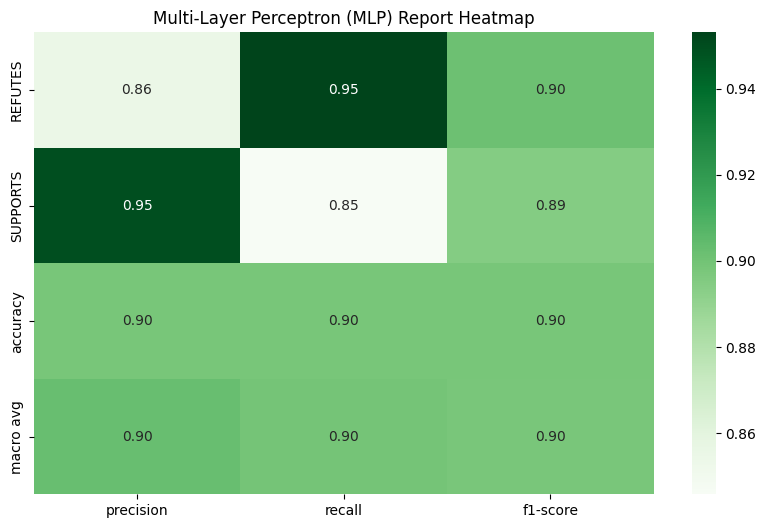

              precision    recall  f1-score   support

     REFUTES       0.86      0.95      0.90       192
    SUPPORTS       0.95      0.85      0.89       201

    accuracy                           0.90       393
   macro avg       0.90      0.90      0.90       393
weighted avg       0.90      0.90      0.90       393



In [18]:
# Metin verisini ve etiketleri ayıralım
text_data = data['LemmatizeClaim']
labels = data['claim_label']

# TF-IDF özellik çıkarımı (30000 en çok kullanılan kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (400 boyuta indir)
svd = TruncatedSVD(n_components=900, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Chi-Square ile ozellik secimi
selector = SelectKBest(chi2, k=900)
X_selected = selector.fit_transform(X_tfidf, y_encoded)

# Verileri dengelemeye calisma anlari xd (Burada onceden X_selected yerine X_reduced vardi)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_selected, y_encoded)

# SMOTE kullanimi (Burada da eskiden X_selected yerine X_reduced vardi)
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_selected, y_encoded)

# Eğitim ve test verilerini ayıralım (oncekiler = X_reduced ve y_encoded, Yeniler = X_resampled ve y_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.3, random_state=42)

# Yapay Sinir Ağları (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
evaluate_model(mlp_model, "Multi-Layer Perceptron (MLP)")

In [19]:
data2 = pd.read_csv("temizClimate.csv")

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Sadece etiketi 1 olan verileri filtreleme
filtered_data = data2[data2['label'] == 1].drop(columns=['label'])
filtered_text_data = filtered_data['text']

# Metinleri str türüne dönüştürme
filtered_text_data = filtered_text_data.astype(str)

# TF-IDF ve SVD uygulama
X_manual_tfidf = tfidf_vectorizer.transform(filtered_text_data)
X_manual_reduced = svd.transform(X_manual_tfidf)

# Model ile tahmin
manual_predictions = mlp_model.predict(X_manual_reduced)




# Tahmin sonuçlarını yazdırma
filtered_data['Predictions'] = manual_predictions
print("Filtered Data with Predictions:\n", filtered_data)

# Eğer grafiksel analiz isteniyorsa:
# Sınıflandırma raporu ve Confusion Matrix (Opsiyonel, tüm etiketi 1 olan veriler için sonuçlar)
print("Classification Report:\n", classification_report(filtered_data['label'], manual_predictions))

# Confusion matrix görselleştirme (etiketlere dayalı değil, yalnızca tahminler)
fig, ax = plt.subplots(figsize=(6, 6))
plt.hist(manual_predictions, bins=2, align='left', color='skyblue', rwidth=0.8)
plt.xticks([0, 1])
plt.title('Prediction Distribution')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.show()

Filtered Data with Predictions:
                                                    text  Predictions
0     total population getting benefit safe potable ...            1
1     wrap — ppl electric’s winter relief assistance...            0
2     believe power monitoring help hcms plant refor...            1
3     solvents used inks produce almost volatile org...            1
9     new buildings breeamcertified provide good ove...            0
...                                                 ...          ...
2605  introduced several new solutions enabled digit...            1
2609  instance stora enso joint operation veracel im...            1
2616  voc products embarked voc challenge manage tra...            1
2620  energy consumption per employee gigajoules per...            1
2632  project partners currently developing supply c...            1

[665 rows x 2 columns]


KeyError: 'label'